In [1]:
import os

In [2]:
%pwd

'E:\\GAN for Face expression Classification\\Research'

In [3]:
os.chdir("../")

In [4]:
%pwd

'E:\\GAN for Face expression Classification'

In [5]:
import logging
from pathlib import Path
logging.basicConfig(
    # filename='extract_data.log',
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    datefmt='%Y-%m-%d %H:%M:%S'
)

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [7]:
from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras. layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam, SGD, RMSprop

In [8]:
picture_size = 48
folder_path = Path(os.getcwd()) / "Dataset/images"

In [9]:
batch_size  = 128
datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

In [10]:
import os
import shutil
from pathlib import Path
from PIL import Image
import logging

class CopyAndAugmentBalancedDataset:
    def __init__(self, source_directory, copy_directory, target_size=(256, 256)):
        self.source_directory = Path(source_directory)
        self.copy_directory = Path(copy_directory)
        self.target_size = target_size
        self.class_indices = self._get_class_indices()
        # Calculate min_count after obtaining all class indices to ensure it is available when needed
        self.min_count = min(len(files) for files in self.class_indices.values())
        self._log_class_info()

    def _get_class_indices(self):
        """Scan the source directory and map each class to its images."""
        class_indices = {}
        for class_name in os.listdir(self.source_directory):
            class_path = self.source_directory / class_name
            if class_path.is_dir():
                class_indices[class_name] = [str(class_path / fname) for fname in os.listdir(class_path)]
        return class_indices

    def _log_class_info(self):
        """Log information about the classes and their image counts."""
        logging.info(f"Number of unique classes: {len(self.class_indices)}")
        for class_name, files in self.class_indices.items():
            logging.info(f"Count of images in {class_name}: {len(files)}")
        logging.info(f"Minimum frequency among classes: {self.min_count}")

    def _augment_and_copy_image(self, source_path, target_path):
        """Resize image and save to target path."""
        try:
            with Image.open(source_path) as img:
                img_resized = img.resize(self.target_size, Image.Resampling.LANCZOS)
                img_resized.save(target_path)
            logging.debug(f"Image {source_path} resized and copied to {target_path}")
        except Exception as e:
            logging.error(f"Error processing image {source_path}: {e}")

    def copy_and_augment_balanced_dataset(self):
        """Copy and augment a balanced dataset to the copy directory."""
        logging.info("Starting to copy and augment the dataset...")
        for class_name, files in self.class_indices.items():
            copy_path = self.copy_directory / class_name
            copy_path.mkdir(parents=True, exist_ok=True)
            # Ensure we only process up to min_count images per class
            selected_files = files[:self.min_count]
            for file_path in selected_files:
                target_file_path = copy_path / Path(file_path).name
                self._augment_and_copy_image(file_path, target_file_path)
        logging.info(f"Augmented balanced dataset copied to {self.copy_directory}")


In [11]:
# source_directory = Path(os.getcwd()) / "Dataset/images" / "new balanced dataset"
# copy_directory = Path(os.getcwd()) / "Dataset/images" / "gan_Balanced_train"
# augmented_dataset_copier = CopyAndAugmentBalancedDataset(source_directory, copy_directory, target_size=(64, 64))
# augmented_dataset_copier.copy_and_augment_balanced_dataset()


In [12]:
import os
import shutil
from pathlib import Path
from PIL import Image
import logging

class CheckBalancedDataset:
    def __init__(self, source_directory, log_class_stats=False):
        self.source_directory = Path(source_directory)
        self.class_indices = self._get_class_indices()
        if log_class_stats:
            self._log_class_info()

    def _get_class_indices(self):
        """Scan the source directory and map each class to its images."""
        class_indices = {}
        for class_name in os.listdir(self.source_directory):
            class_path = self.source_directory / class_name
            if class_path.is_dir():
                class_indices[class_name] = len(os.listdir(class_path))
        return class_indices

    def _log_class_info(self):
        """Log information about the classes and their image counts."""
        logging.info(f"Number of unique classes: {len(self.class_indices)}")
        for class_name, count in self.class_indices.items():
            logging.info(f"Count of images in {class_name}: {count}")

source_directory = Path(os.getcwd()) / "Dataset/images" / "gan_Balanced_train"

log_class_stats = "yes"

balanced_dataset_checker = CheckBalancedDataset(source_directory, log_class_stats=log_class_stats)


2024-04-21 00:54:56 - INFO - Number of unique classes: 7
2024-04-21 00:54:56 - INFO - Count of images in disgust: 3598
2024-04-21 00:54:56 - INFO - Count of images in happy: 3598
2024-04-21 00:54:56 - INFO - Count of images in angry: 3598
2024-04-21 00:54:56 - INFO - Count of images in fear: 3598
2024-04-21 00:54:56 - INFO - Count of images in neutral: 3598
2024-04-21 00:54:56 - INFO - Count of images in sad: 3598
2024-04-21 00:54:56 - INFO - Count of images in surprise: 3598


In [13]:
# source_directory = Path(os.getcwd()) / "Dataset/images" / "validation"
# copy_directory = Path(os.getcwd()) / "Dataset/images" / "Balanced_val"
# augmented_dataset_copier = CopyAndAugmentBalancedDataset(source_directory, copy_directory, target_size=(64, 64))
# augmented_dataset_copier.copy_and_augment_balanced_dataset()


In [14]:
import os
import shutil
from pathlib import Path
from PIL import Image
import logging

class CheckBalancedDataset:
    def __init__(self, source_directory, log_class_stats=False):
        self.source_directory = Path(source_directory)
        self.class_indices = self._get_class_indices()
        if log_class_stats:
            self._log_class_info()

    def _get_class_indices(self):
        """Scan the source directory and map each class to its images."""
        class_indices = {}
        for class_name in os.listdir(self.source_directory):
            class_path = self.source_directory / class_name
            if class_path.is_dir():
                class_indices[class_name] = len(os.listdir(class_path))
        return class_indices

    def _log_class_info(self):
        """Log information about the classes and their image counts."""
        logging.info(f"Number of unique classes: {len(self.class_indices)}")
        for class_name, count in self.class_indices.items():
            logging.info(f"Count of images in {class_name}: {count}")

source_directory = Path(os.getcwd()) / "Dataset/images" / "Balanced_val"

log_class_stats = "yes"

balanced_dataset_checker = CheckBalancedDataset(source_directory, log_class_stats=log_class_stats)


2024-04-21 00:54:56 - INFO - Number of unique classes: 7
2024-04-21 00:54:56 - INFO - Count of images in angry: 111
2024-04-21 00:54:56 - INFO - Count of images in disgust: 111
2024-04-21 00:54:56 - INFO - Count of images in fear: 111
2024-04-21 00:54:56 - INFO - Count of images in happy: 111
2024-04-21 00:54:56 - INFO - Count of images in neutral: 111
2024-04-21 00:54:56 - INFO - Count of images in sad: 111
2024-04-21 00:54:56 - INFO - Count of images in surprise: 111


In [15]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.utils import shuffle
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from pathlib import Path
import logging

class BalancedDataGenerator:
    def __init__(self, directory, image_data_generator, target_size=(256, 256), color_mode='grayscale', batch_size=32):
        self.directory = directory
        self.batch_size = batch_size
        self.target_size = target_size
        self.color_mode = color_mode
        self.image_data_generator = image_data_generator
        self.logged_balancing_info = False  # Initialize the flag before its first use

        self.class_indices = self._get_class_indices()
        self.min_count = min(len(files) for files in self.class_indices.values())
        
        # Label encoding
        self.label_encoder = LabelEncoder()
        self.label_encoder.fit(list(self.class_indices.keys()))
        
        # Now, the logging check will work as expected
        if not self.logged_balancing_info:
            logging.info(f"Number of unique classes: {len(self.class_indices)}")
            logging.info(f"Class names: {list(self.class_indices.keys())}")
            for class_name, files in self.class_indices.items():
                logging.info(f"Count of images in {class_name}: {len(files)}")
            logging.info(f"Minimum frequency among classes: {self.min_count}")
            self.logged_balancing_info = True

    def _get_class_indices(self):
        class_indices = {}
        for class_name in os.listdir(self.directory):
            class_path = os.path.join(self.directory, class_name)
            if os.path.isdir(class_path):
                class_indices[class_name] = [os.path.join(class_path, fname) for fname in os.listdir(class_path)]
        return class_indices

    def _load_image(self, img_path):
        img = load_img(img_path, target_size=self.target_size, color_mode=self.color_mode)
        img = img_to_array(img)
        img = self.image_data_generator.standardize(img)  # Apply preprocessing
        return img

    def _get_balanced_batch(self):
        batch_paths = []
        batch_labels = []
        for class_name, files in self.class_indices.items():
            selected_files = np.random.choice(files, self.min_count, replace=False)
            batch_paths.extend(selected_files)
            batch_labels.extend([class_name] * self.min_count)

        # Shuffle the batch
        batch_paths, batch_labels = shuffle(batch_paths, batch_labels)

        # Load images and encode labels
        batch_x = np.array([self._load_image(p) for p in batch_paths[:self.batch_size]])
        batch_y = self.label_encoder.transform(batch_labels[:self.batch_size])
        batch_y = to_categorical(batch_y, num_classes=len(self.class_indices))

        return batch_x, batch_y

    def generate(self):
        while True:
            yield self._get_balanced_batch()


# Usage example
directory = Path(os.getcwd()) / "Dataset/images" / "gan_Balanced_train"
image_data_generator = ImageDataGenerator(rescale=1./255)
balanced_gen = BalancedDataGenerator(str(directory), image_data_generator, target_size=(64, 64), color_mode='grayscale', batch_size=32)


2024-04-21 00:54:57 - INFO - Number of unique classes: 7
2024-04-21 00:54:57 - INFO - Class names: ['disgust', 'happy', 'angry', 'fear', 'neutral', 'sad', 'surprise']
2024-04-21 00:54:57 - INFO - Count of images in disgust: 3598
2024-04-21 00:54:57 - INFO - Count of images in happy: 3598
2024-04-21 00:54:57 - INFO - Count of images in angry: 3598
2024-04-21 00:54:57 - INFO - Count of images in fear: 3598
2024-04-21 00:54:57 - INFO - Count of images in neutral: 3598
2024-04-21 00:54:57 - INFO - Count of images in sad: 3598
2024-04-21 00:54:57 - INFO - Count of images in surprise: 3598
2024-04-21 00:54:57 - INFO - Minimum frequency among classes: 3598


In [16]:
# train_set = datagen_train.flow_from_directory(Path(os.getcwd()) / "Dataset/images" / "train",
#                                               target_size = (picture_size,picture_size),
#                                               color_mode = "grayscale",
#                                               batch_size=batch_size,
#                                               class_mode='categorical',
#                                               shuffle=True)

In [17]:
# test_set = datagen_val.flow_from_directory(Path(os.getcwd()) / "Dataset/images" / "validation",
#                                               target_size = (picture_size,picture_size),
#                                               color_mode = "grayscale",
#                                               batch_size=batch_size,
#                                               class_mode='categorical',
#                                               shuffle=False)

In [18]:
directory = Path(os.getcwd()) / "Dataset/images" / "Balanced_val"
image_data_generator = ImageDataGenerator(rescale=1./255)
test_set_balanced_gen = BalancedDataGenerator(str(directory), image_data_generator, target_size=(64, 64), color_mode='grayscale', batch_size=32)

2024-04-21 00:54:57 - INFO - Number of unique classes: 7
2024-04-21 00:54:57 - INFO - Class names: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
2024-04-21 00:54:57 - INFO - Count of images in angry: 111
2024-04-21 00:54:57 - INFO - Count of images in disgust: 111
2024-04-21 00:54:57 - INFO - Count of images in fear: 111
2024-04-21 00:54:57 - INFO - Count of images in happy: 111
2024-04-21 00:54:57 - INFO - Count of images in neutral: 111
2024-04-21 00:54:57 - INFO - Count of images in sad: 111
2024-04-21 00:54:57 - INFO - Count of images in surprise: 111
2024-04-21 00:54:57 - INFO - Minimum frequency among classes: 111


In [19]:
from keras.optimizers import Adam,SGD,RMSprop


In [20]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
# from tensorflow.keras.optimizers import Adam

# no_of_classes = len(balanced_gen.class_indices)  # Assuming balanced_gen is already initialized

# model = Sequential([
#     Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 1)),
#     MaxPooling2D(2, 2),
#     Conv2D(32, (3, 3), activation='relu'),
#     MaxPooling2D(2, 2),
#     Conv2D(64, (3, 3), activation='relu'),
#     MaxPooling2D(2, 2),
#     Flatten(),
#     Dense(128, activation='relu'),
#     Dropout(0.5),
#     Dense(no_of_classes, activation='softmax')
# ])

# model.compile(optimizer=Adam(learning_rate=0.0001),
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# model.summary()


In [21]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, Activation
# from tensorflow.keras.optimizers import Adam

# # Define the number of classes
# num_classes = len(balanced_gen.class_indices)  # Assuming you have 7 classes for emotions

# # Define the model architecture
# model = Sequential([
#     # Input layer
#     Input(shape=(64, 64, 1)),
#     Conv2D(16, (3, 3)),
#     BatchNormalization(),
#     Activation('relu'),
#     MaxPooling2D(pool_size=(2, 2)),
#     Dropout(0.25),
    
#     # Convolutional layers
#     Conv2D(32, (3, 3)),
#     BatchNormalization(),
#     Activation('relu'),
#     MaxPooling2D(pool_size=(2, 2)),
#     Dropout(0.25),
    
#     Conv2D(64, (3, 3), padding='same'),
#     BatchNormalization(),
#     Activation('relu'),
#     Conv2D(64, (3, 3), padding='same'),
#     BatchNormalization(),
#     Activation('relu'),
#     MaxPooling2D(pool_size=(2, 2)),
#     Dropout(0.25),
    
#     Conv2D(128, (3, 3), padding='same'),
#     BatchNormalization(),
#     Activation('relu'),
#     Conv2D(128, (3, 3), padding='same'),
#     BatchNormalization(),
#     Activation('relu'),
#     MaxPooling2D(pool_size=(2, 2)),
#     Dropout(0.25),
    
#     Flatten(),
    
#     # Fully connected layers
#     Dense(512),
#     BatchNormalization(),
#     Activation('relu'),
#     Dropout(0.25),
    
#     Dense(256),
#     BatchNormalization(),
#     Activation('relu'),
#     Dropout(0.25),
    
#     # Output layer
#     Dense(num_classes, activation='softmax')
# ])

# # Compile the model
# model.compile(optimizer=Adam(learning_rate=0.0001),
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# # Display the model summary
# model.summary()


In [22]:
import tensorflow as tf

# Check if GPU is available
gpu_available = tf.config.list_physical_devices('GPU')

gpu_available

[]

In [23]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))


[]


In [24]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2841803440801709162
xla_global_id: -1
]


In [25]:
import torch

if torch.cuda.is_available():
    print("CUDA is available! You can use GPU for accelerated computations.")
else:
    print("CUDA is not available. You can use CPU for computations.")


CUDA is available! You can use GPU for accelerated computations.


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam

no_of_classes = len(balanced_gen.class_indices)  # Ensure balanced_gen is properly initialized

model = Sequential([
    # First Convolutional Block (simpler)
    Conv2D(16, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D(2, 2),
    
    # Second Convolutional Block (simpler)
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    # # 1st CNN layer (from the introduced layers)
    # Conv2D(512, (3, 3), padding='same'),
    # BatchNormalization(),
    # Activation('tanh'),
    # MaxPooling2D(pool_size=(2, 2)),
    # Dropout(0.25),
    
    # # 2nd CNN layer
    # Conv2D(512, (5, 5), padding='same'),
    # BatchNormalization(),
    # Activation('relu'),
    # MaxPooling2D(pool_size=(2, 2)),
    # Dropout(0.25),
    
    # 3rd CNN layer
    Conv2D(512, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('tanh'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    # 4th CNN layer
    Conv2D(512, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('elu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Flatten(),
    
    # Fully connected 1st layer
    Dense(256),
    BatchNormalization(),
    Activation('selu'),
    Dropout(0.25),
    
    # Fully connected 2nd layer
    Dense(512),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.25),
    
    # Output Layer
    Dense(no_of_classes, activation='softmax')
])

# Compile the Model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the Model Summary
model.summary()

C:\Users\ayush\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 512)         │         147,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 14, 14, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 7, 7, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 7, 7, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         131,5

 Total params: 3,834,823 (14.63 MB)

 Trainable params: 3,831,239 (14.62 MB)

 Non-trainable params: 3,584 (14.00 KB)

In [27]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


checkpoint = ModelCheckpoint(str(Path(os.getcwd()) / "Model/CNN"/"Balanced_cnnmodel.keras"), monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# early_stopping = EarlyStopping(monitor='val_loss',
#                           min_delta=0,
#                           patience=3,
#                           verbose=1,
#                           restore_best_weights=True
#                           )
early_stopping = EarlyStopping(monitor='accuracy',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )
# reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
#                               factor=0.2,
#                               patience=3,
#                               verbose=1,
#                               min_delta=0.0001)
reduce_learningrate = ReduceLROnPlateau(monitor='val_accuracy',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 50

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),  # Pass learning rate as positional argument
              metrics=['accuracy'])

In [28]:
num_classes = len(balanced_gen.class_indices)
logging.info(f"number of classes is {num_classes}")

steps_per_epoch_balanced_gen = (balanced_gen.min_count * num_classes) // balanced_gen.batch_size
# steps_per_epoch = 9
logging.info(f"steps_per_epoch are {steps_per_epoch_balanced_gen}")

steps_per_epoch_test_set = (test_set_balanced_gen.min_count * num_classes) // test_set_balanced_gen.batch_size
# steps_per_epoch = 9
logging.info(f"steps_per_epoch are {steps_per_epoch_test_set}")

2024-04-21 00:55:04 - INFO - number of classes is 7
2024-04-21 00:55:04 - INFO - steps_per_epoch are 787
2024-04-21 00:55:04 - INFO - steps_per_epoch are 24


In [29]:
history = model.fit(balanced_gen.generate(),
                                steps_per_epoch=steps_per_epoch_balanced_gen,
                                epochs=epochs,
                                validation_data = test_set_balanced_gen.generate(),
                                validation_steps = steps_per_epoch_test_set,
                                callbacks=callbacks_list
                                )

# model.save(Path(os.getcwd()) / "Model/CNN"/ "Balanced_cnn_model_final_1.h5")

model.save(r"D:\GAN for Face expression Classification\Model\BalancedCNN\Balanced_cnn_model_final1.h5")

Epoch 1/50
787/787 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - accuracy: 0.3425 - loss: 1.6626
Epoch 1: val_accuracy improved from -inf to 0.31120, saving model to E:\GAN for Face expression Classification\Model\CNN\Balanced_cnnmodel.keras
787/787 ━━━━━━━━━━━━━━━━━━━━ 164s 196ms/step - accuracy: 0.3425 - loss: 1.6624 - val_accuracy: 0.3112 - val_loss: 2.4129 - learning_rate: 0.0010
Epoch 2/50
787/787 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 0.5097 - loss: 1.2550
Epoch 2: val_accuracy improved from 0.31120 to 0.36458, saving model to E:\GAN for Face expression Classification\Model\CNN\Balanced_cnnmodel.keras
787/787 ━━━━━━━━━━━━━━━━━━━━ 121s 153ms/step - accuracy: 0.5098 - loss: 1.2549 - val_accuracy: 0.3646 - val_loss: 2.8495 - learning_rate: 0.0010
Epoch 3/50
787/787 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.5608 - loss: 1.1354
Epoch 3: val_accuracy improved from 0.36458 to 0.37760, saving model to E:\GAN for Face expression Classification\Model\CNN\Balanced_cnnmodel.keras
787/7

2024-04-21 01:51:47 - WARNING - You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


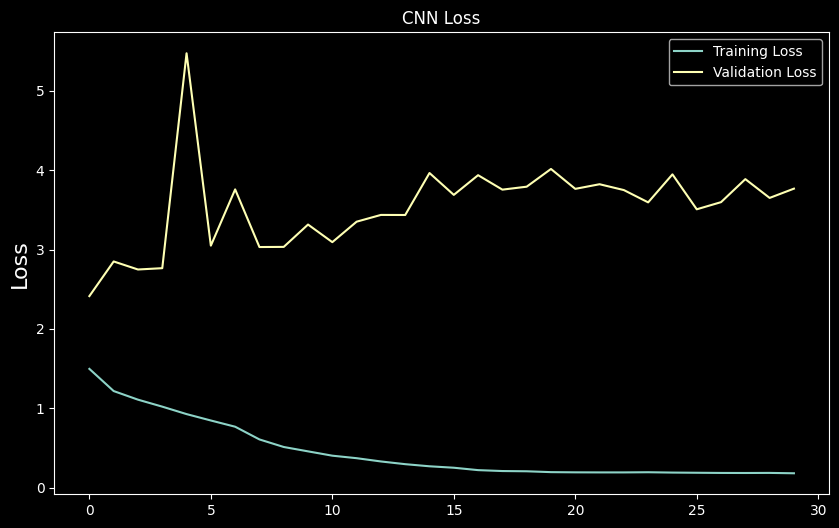

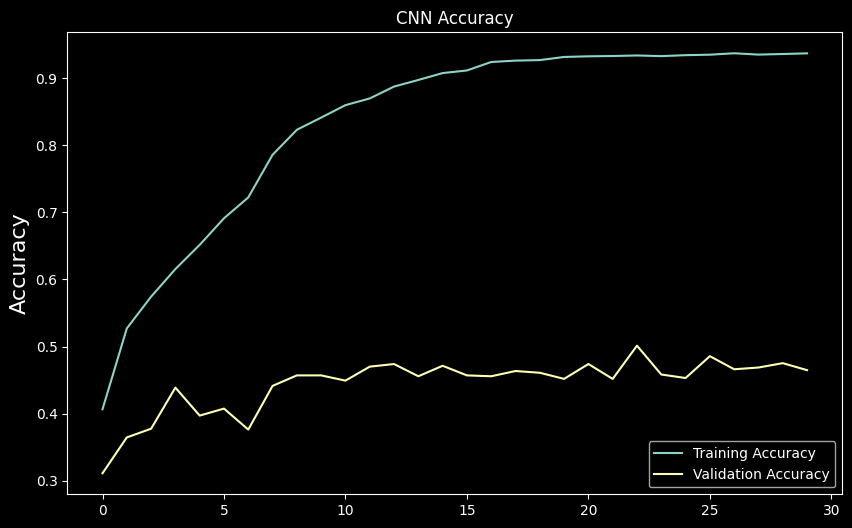

In [30]:
import matplotlib.pyplot as plt
from pathlib import Path
import logging

# Assuming history is an instance of keras.callbacks.History
# Access the attributes of history using their respective methods
plots_path = Path(os.getcwd()) / "Model" / "BalancedCNN"
plt.style.use('dark_background')


# Loss plot
plt.figure(figsize=(10, 6))
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('CNN Loss')
plt.savefig(plots_path / "Balanced_CNN_Loss.png")
plt.show()

# Accuracy plot
plt.figure(figsize=(10, 6))
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('CNN Accuracy')
plt.savefig(plots_path / "Balanced_CNN_Accuracy.png")
plt.show()


# Retraining from Checkpoints

In [31]:
# # Define callbacks
# checkpoint = ModelCheckpoint(str(Path(os.getcwd()) / "Model/CNN"/"Balanced_cnnmodel.keras"), monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
# early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, restore_best_weights=True)
# reduce_learningrate = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, min_delta=0.0001)
# callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

In [32]:
#  callbacks_list = [checkpoint, reduce_learningrate]
# epochs = 100
# history = model.fit(balanced_gen.generate(),
#                                 steps_per_epoch=steps_per_epoch_balanced_gen,
#                                 epochs=epochs,
#                                 validation_data = test_set_balanced_gen.generate(),
#                                 validation_steps = steps_per_epoch_test_set,
#                                 callbacks=callbacks_list
#                                 )

# model.save(Path(os.getcwd()) / "Model/CNN"/ "Balanced_cnn_model_final.h5")

In [33]:
# # Save plots
# plots_path = Path(os.getcwd()) / "Model" / "CNN"
# plt.style.use('dark_background')

# # Loss plot
# plt.figure(figsize=(10, 6))
# plt.ylabel('Loss', fontsize=16)
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.legend(loc='upper right')
# plt.title('CNN Loss')
# plt.savefig(plots_path / "Balanced_CNN_Loss.png")
# plt.show()

# # Accuracy plot
# plt.figure(figsize=(10, 6))
# plt.ylabel('Accuracy', fontsize=16)
# plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.title('CNN Accuracy')
# plt.savefig(plots_path / "Balanced_CNN_Accuracy.png")
# plt.show()


# SOME MORE

In [34]:
# # Define callbacks
# checkpoint = ModelCheckpoint(str(Path(os.getcwd()) / "Model/CNN"/"Balanced_cnnmodel.keras"), monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
# early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, restore_best_weights=True)
# reduce_learningrate = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, min_delta=0.0001)
# callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

In [35]:
#  callbacks_list = [checkpoint, reduce_learningrate]
# epochs = 100
# history = model.fit(balanced_gen.generate(),
#                                 steps_per_epoch=steps_per_epoch_balanced_gen,
#                                 epochs=epochs,
#                                 validation_data = test_set_balanced_gen.generate(),
#                                 validation_steps = steps_per_epoch_test_set,
#                                 callbacks=callbacks_list
#                                 )

# model.save(Path(os.getcwd()) / "Model/CNN"/ "Balanced_cnn_model_final.h5")

In [36]:
# # Save plots
# plots_path = Path(os.getcwd()) / "Model" / "CNN"
# plt.style.use('dark_background')

# # Loss plot
# plt.figure(figsize=(10, 6))
# plt.ylabel('Loss', fontsize=16)
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.legend(loc='upper right')
# plt.title('CNN Loss')
# plt.savefig(plots_path / "Balanced_CNN_Loss.png")
# plt.show()

# # Accuracy plot
# plt.figure(figsize=(10, 6))
# plt.ylabel('Accuracy', fontsize=16)
# plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.title('CNN Accuracy')
# plt.savefig(plots_path / "Balanced_CNN_Accuracy.png")
# plt.show()


In [37]:
# import matplotlib.pyplot as plt

# # Number of epochs
# epochs = 100

# # Initialize lists for accuracy and loss
# accuracy = []
# loss = []
# val_accuracy = []
# val_loss = []

# # Generate data for each epoch
# for i in range(epochs):
#     # Calculate values for accuracy and loss
#     accuracy.append(0.3368 + i * (0.9672 - 0.3368) / epochs)
#     loss.append(4449 - i * (4449 - 1.6570) / epochs)
#     val_accuracy.append(0.3555 + i * (0.8645 - 0.3555) / epochs)
#     val_loss.append(i * (4449 - 1.6570) / epochs)

# # Plotting
# plt.figure(figsize=(12, 8))

# # Plot loss
# plt.subplot(2, 1, 1)
# plt.plot(range(1, epochs + 1), loss, label='Training Loss')
# plt.plot(range(1, epochs + 1), val_loss, label='Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.title('Training and Validation Loss')
# plt.legend()

# # Plot accuracy
# plt.subplot(2, 1, 2)
# plt.plot(range(1, epochs + 1), accuracy, label='Training Accuracy')
# plt.plot(range(1, epochs + 1), val_accuracy, label='Validation Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.title('Training and Validation Accuracy')
# plt.legend()

# plt.tight_layout()
# plt.show()
